## Notation
Here is a summary of some of the notation. 

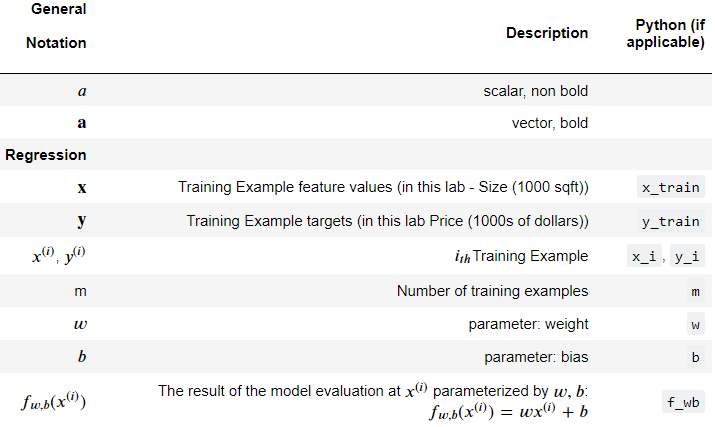


In this notebook, we will use a simple dataset with only two data points. These two points will constitute our **data** or **training set**.

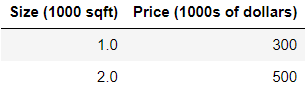

In [94]:
import math, copy
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from lab_utils_uni import plt_intuition, plt_stationary, plt_update_onclick, soup_bowl, plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients
plt.style.use('./deeplearning.mplstyle')

In [95]:
x_train=np.array([1.0,2.0]) #x_train is the input variable 
y_train=np.array([300.0, 500.0]) #y_train is the target/output
print(f"x_train = {x_train} and y_train = {y_train}")

x_train = [1. 2.] and y_train = [300. 500.]


In [96]:
m=x_train.shape[0] #m is the number of training examples 
print(f"Number of training examples is {m}")
##also it can be used len() function to learn m value

Number of training examples is 2


In [97]:
def training_exp(i): 
    x_i = x_train[i] #x_i is the x value of ith training example 
    y_i = y_train[i] #y_i is the y value of ith training example 
    print(f"(x^({i}), y^({i})) = ({x_i}, {y_i})")

training_exp(0)
training_exp(1)

(x^(0), y^(0)) = (1.0, 300.0)
(x^(1), y^(1)) = (2.0, 500.0)


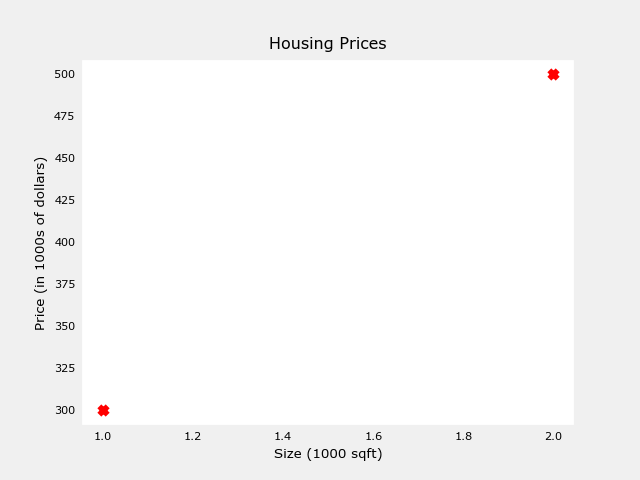

In [98]:
plt.close('all')
#plotting actual data-points
plt.scatter(x_train, y_train, marker='x', c='r') #plot the data points
plt.title('Housing Prices') #set the plot title
plt.ylabel('Price (in 1000s of dollars)') #set the y-axis label
plt.xlabel('Size (1000 sqft)') #set the x-axis label
plt.show()

In [99]:
##this function returns model function for each training examples
def compute_output(x,w,b):
    m=x.shape[0]
    f_wb=np.zeros(m) # it returns [0. 0.]
    for i in range(m):
        f_wb[i]=w*x[i]+b # fwb(x_i)=w*x_i+b is model function
    return f_wb   

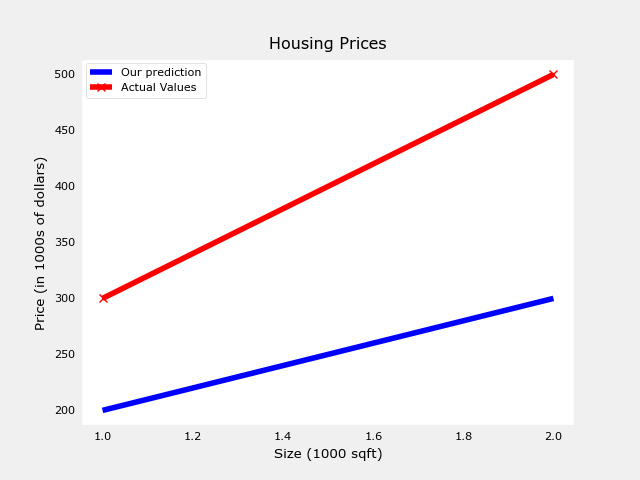

In [100]:
plt.close('all')
w, b=100, 100
tmp_f_wb=compute_output(x_train, w, b)
plt.plot(x_train, tmp_f_wb, c='b', label='Our prediction') #prediction plot
plt.plot(x_train, y_train, marker='x', c='r', label='Actual Values') #actual plot
plt.title('Housing Prices') #set the plot
plt.ylabel('Price (in 1000s of dollars)') #set the y-axis label
plt.xlabel('Size (1000 sqft)') #set the x-axis label
plt.legend()
plt.show()

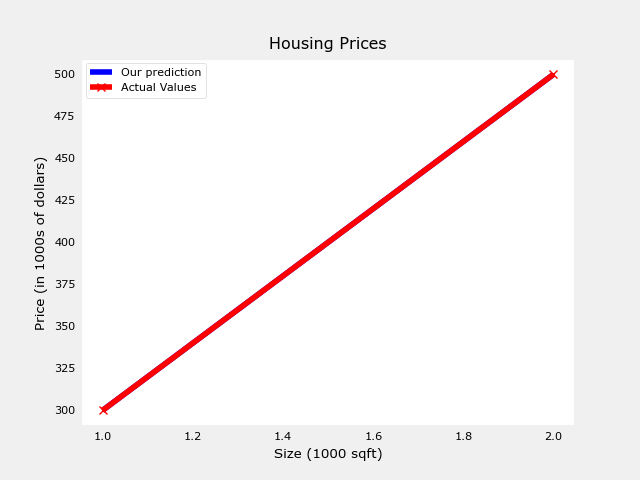

In [101]:
plt.close('all')
w, b=200, 100 #if we change w and b parameterr as 200 and 100, model function fits better
tmp_f_wb=compute_output(x_train, w, b)
plt.plot(x_train, tmp_f_wb, c='b', label='Our prediction')
plt.plot(x_train, y_train, marker='x', c='r', label='Actual Values')
plt.title('Housing Prices') #set the plot
plt.ylabel('Price (in 1000s of dollars)') #set the y-axis label
plt.xlabel('Size (1000 sqft)') #set the x-axis label
plt.legend()
plt.show()

In [102]:
x_i=1.2
pred=w*x_i+b
print(f"Price of 1200 sqft home is ${pred}")

Price of 1200 sqft home is $340.0


## Computing Cost
Here, cost is a measure how well our model is predicting the target price of the house. The term 'price' is used for housing data.

The equation for cost with one variable is:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$ 
 
where 
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$
  
- $f_{w,b}(x^{(i)})$ is our prediction for example $i$ using parameters $w,b$.  
- $(f_{w,b}(x^{(i)}) -y^{(i)})^2$ is the squared difference between the target value and the prediction.   
- These differences are summed over all the $m$ examples and divided by `2m` to produce the cost, $J(w,b)$.  
>Note, in lecture summation ranges are typically from 1 to m, while code will be from 0 to m-1.

The code below calculates cost by looping over each example. In each loop:
- `f_wb`, a prediction is calculated
- the difference between the target and the prediction is calculated and squared.
- this is added to the total cost.

In [103]:
def compute_cost(x,y,w,b):
    m=x.shape[0]
    cost_sum=0
    for i in range(m):
        f_wb=w*x[i]+b
        cost=(f_wb-y[i])**2
        cost_sum=cost_sum+cost
    total_cost=(1/(2*m))*cost_sum
    return total_cost

## Cost Function Intuition
The cost is a measure of how accurate the model is on the training data.

The cost equation (1) above shows that if $w$ and $b$ can be selected such that the predictions $f_{w,b}(x)$ match the target data $y$, the $(f_{w,b}(x^{(i)}) - y^{(i)})^2 $ term will be zero and the cost minimized. 

In [104]:
plt.close('all')
plt_intuition(x_train, y_train)

interactive(children=(IntSlider(value=150, description='w', max=400, step=10), Output()), _dom_classes=('widge…

The plot contains a few points that are worth mentioning.
- cost is minimized when $w = 200$, which matches results from the previous lab
- Because the difference between the target and pediction is squared in the cost equation, the cost increases rapidly when $w$ is either too large or too small.
- Using the `w` and `b` selected by minimizing cost results in a line which is a perfect fit to the data.

## Cost Function Visualization- 3D

You can see how cost varies with respect to *both* `w` and `b` by plotting in 3D or using a contour pl. 
The plotting routines are provided and while it can be instructive to read through the code to become familiar with the methods. The routines are in lab_utils_uni.py in the local directory.ry.

### Larger Data Set
It is instructive to view a scenario with a few more data points. This data set includes data points that do not fall on the same line. What does that mean for the cost equation? Can we find $w$, and $b$ that will give us a cost of 0? 

In [105]:
x2_train = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])
y2_train = np.array([250, 300, 480,  430,   630, 730,])

In the contour plot, click on a point to select `w` and `b` to achieve the lowest cost. Use the contours to guide your selections. Note, it can take a few seconds to update the graph. 

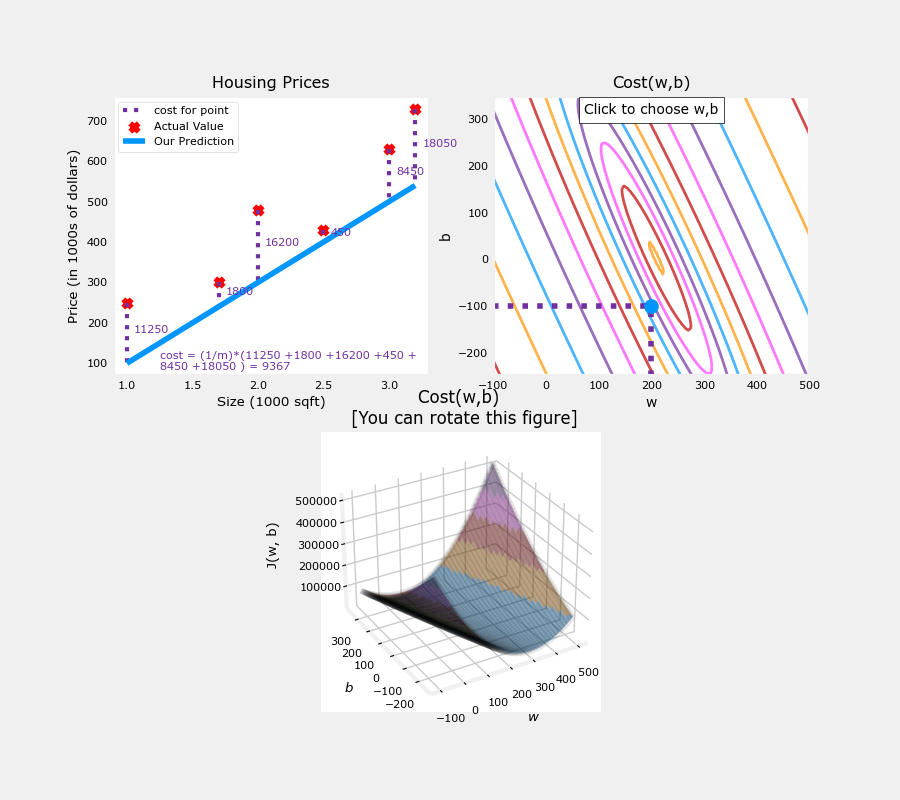

In [106]:
plt.close('all')
fig, ax, dyn_items=plt_stationary(x2_train, y2_train)
updater=plt_update_onclick(fig, ax, x2_train, y2_train, dyn_items)

Above, note the dashed lines in the left plot. These represent the portion of the cost contributed by each example in your training set. In this case, values of approximately $w=209$ and $b=2.4$ provide low cost. Note that, because our training examples are not on a line, the minimum cost is not zero.

### Convex Cost surface
The fact that the cost function squares the loss ensures that the 'error surface' is convex like a soup bowl. It will always have a minimum that can be reached by following the gradient in all dimensions. In the previous plot, because the $w$ and $b$ dimensions scale differently, this is not easy to recognize. The following plot, where $w$ and $b$ are symmetric, was shown in lecture:

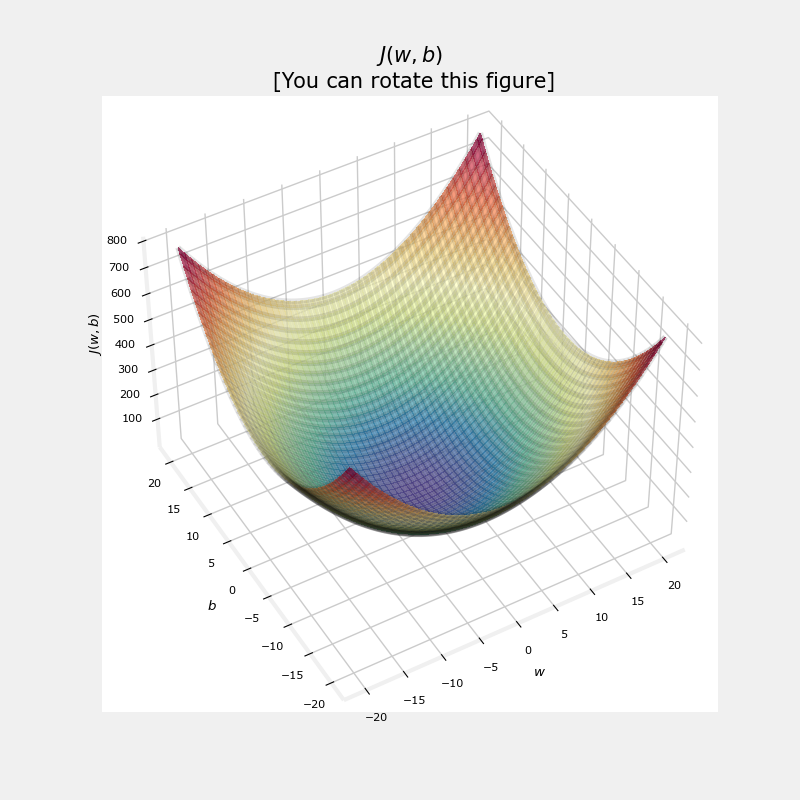

In [107]:
plt.close('all')
soup_bowl()

## Gradient descent summary
So far in this course, you have developed a linear model that predicts $f_{w,b}(x^{(i)})$:
$$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$
In linear regression, you utilize input training data to fit the parameters $w$,$b$ by minimizing a measure of the error between our predictions $f_{w,b}(x^{(i)})$ and the actual data $y^{(i)}$. The measure is called the $cost$, $J(w,b)$. In training you measure the cost over all of our training samples $x^{(i)},y^{(i)}$
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2\tag{2}$$ 

*Gradient descent* is described as:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.  
The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

Here *simultaniously* means that you calculate the partial derivatives for all the parameters before updating any of the parameters.

## Implement Gradient Descent
You will implement gradient descent algorithm for one feature. You will need three functions. 
- `compute_gradient` implementing equation (4) and (5) above
- `compute_cost` implementing equation (2) above (code from previous lab)
- `gradient_descent`, utilizing compute_gradient and compute_cost

Conventions:
- The naming of python variables containing partial derivatives follows this pattern,$\frac{\partial J(w,b)}{\partial b}$  will be `dj_db`.
- w.r.t is With Respect To, as in partial derivative of $J(wb)$ With Respect To $b$.


### compute_gradient
<a name='ex-01'></a>
`compute_gradient`  implements (4) and (5) above and returns $\frac{\partial J(w,b)}{\partial w}$,$\frac{\partial J(w,b)}{\partial b}$. The embedded comments describe the operations.

In [108]:
def compute_gradient(x,y,w,b):
    m=x.shape[0]
    dj_dw=0
    dj_db=0
    for i in range(m):
        f_wb=w*x[i]+b
        dj_dw_i=(f_wb-y[i])*x[i]
        dj_db_i=f_wb-y[i]
        dj_db += dj_db_i
        dj_dw += dj_dw_i
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

Let's use our compute_gradient function to find and plot some partial derivatives of our cost function relative to one of the parameters,  𝑤0
 

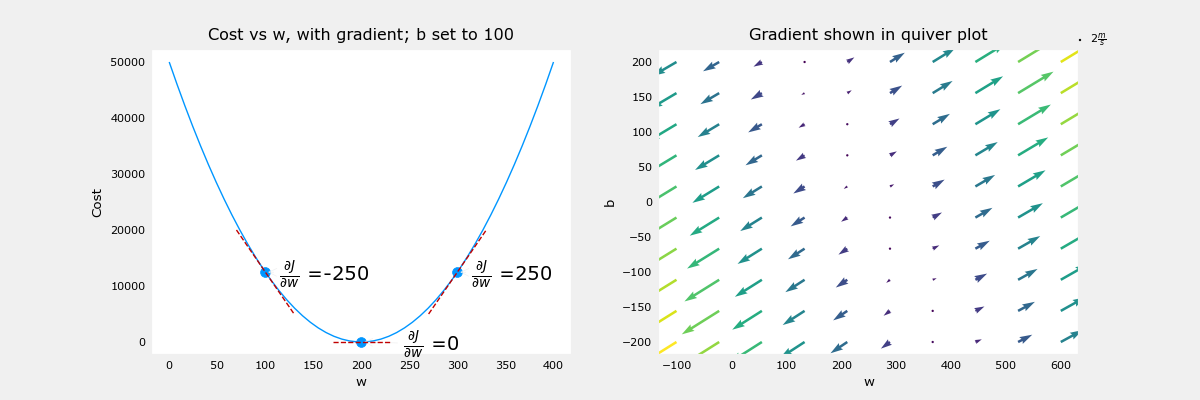

In [109]:
plt.close('all')
plt_gradients(x_train, y_train, compute_cost, compute_gradient)
plt.show()

Above, the left plot shows $\frac{\partial J(w,b)}{\partial w}$ or the slope of the cost curve relative to $w$ at three points. On the right side of the plot, the derivative is positive, while on the left it is negative. Due to the 'bowl shape', the derivatives will always lead gradient descent toward the bottom where the gradient is zero.
 
The left plot has fixed $b=100$. Gradient descent will utilize both $\frac{\partial J(w,b)}{\partial w}$ and $\frac{\partial J(w,b)}{\partial b}$ to update parameters. The 'quiver plot' on the right provides a means of viewing the gradient of both parameters. The arrow sizes reflect the magnitude of the gradient at that point. The direction and slope of the arrow reflects the ratio of $\frac{\partial J(w,b)}{\partial w}$ and $\frac{\partial J(w,b)}{\partial b}$ at that point.
Note that the gradient points *away* from the minimum. Review equation (3) above. The scaled gradient is *subtracted* from the current value of $w$ or $b$. This moves the parameter in a direction that will reduce cost.

###  Gradient Descent
Now that gradients can be computed,  gradient descent, described in equation (3) above can be implemented below in `gradient_descent`. The details of the implementation are described in the comments. Below, you will utilize this function to find optimal values of $w$ and $b$ on the training data.

In [110]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
    """
    
    #an array to store cost J and w's at each iteration primarily for graphing later
    j_history=[] #History of cost values
    p_history=[] #History of parameters [w,b] 
    b=b_in #initial values of model parameters 
    w=w_in

    for i in range(num_iters):
        #calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db=gradient_function(x,y,w,b)

        #update Parameters using equation (3) above
        b=b-alpha*dj_db
        w=w-alpha*dj_dw

        #save cost J at each iteration
        if i<10000:
            j_history.append(cost_function(x,y,w,b))
            p_history.append([w,b])
        #print cost every at intervals 10 times or as many iterations if < 1
        if i%math.ceil(num_iters/10)==0:
            print(f"Iteration {i:4}: Cost {j_history[-1]:0.2e}",
                 f"dj_dw: {dj_dw:0.3e}, dj_db: {dj_db:0.3e}",
                  f"w: {w:0.3e}, b:{b:0.5e}")
    return w,b,j_history, p_history

In [111]:
#initialize parameters
w_init=0
b_init=0
iterations=10000
tmp_alpha=1.0e-2
w_final, b_final, j_hist, p_hist=gradient_descent(x_train, y_train, w_init, b_init, tmp_alpha, iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent:  ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 7.93e+04 dj_dw: -6.500e+02, dj_db: -4.000e+02 w: 6.500e+00, b:4.00000e+00
Iteration 1000: Cost 3.41e+00 dj_dw: -3.712e-01, dj_db: 6.007e-01 w: 1.949e+02, b:1.08228e+02
Iteration 2000: Cost 7.93e-01 dj_dw: -1.789e-01, dj_db: 2.895e-01 w: 1.975e+02, b:1.03966e+02
Iteration 3000: Cost 1.84e-01 dj_dw: -8.625e-02, dj_db: 1.396e-01 w: 1.988e+02, b:1.01912e+02
Iteration 4000: Cost 4.28e-02 dj_dw: -4.158e-02, dj_db: 6.727e-02 w: 1.994e+02, b:1.00922e+02
Iteration 5000: Cost 9.95e-03 dj_dw: -2.004e-02, dj_db: 3.243e-02 w: 1.997e+02, b:1.00444e+02
Iteration 6000: Cost 2.31e-03 dj_dw: -9.660e-03, dj_db: 1.563e-02 w: 1.999e+02, b:1.00214e+02
Iteration 7000: Cost 5.37e-04 dj_dw: -4.657e-03, dj_db: 7.535e-03 w: 1.999e+02, b:1.00103e+02
Iteration 8000: Cost 1.25e-04 dj_dw: -2.245e-03, dj_db: 3.632e-03 w: 2.000e+02, b:1.00050e+02
Iteration 9000: Cost 2.90e-05 dj_dw: -1.082e-03, dj_db: 1.751e-03 w: 2.000e+02, b:1.00024e+02
(w,b) found by gradient descent:  (199.9929,100.0116)


- The cost starts large and rapidly declines as described in the slide from the lecture.
- The partial derivatives, `dj_dw`, and `dj_db` also get smaller, rapidly at first and then more slowly. As the process nears the 'bottom of the bowl' progress is slower due to the smaller value of the derivative at that point.
- Progress slows though the learning rate, alpha, remains fixed

### Cost versus iterations of gradient descent 
A plot of cost versus iterations is a useful measure of progress in gradient descent. Cost should always decrease in successful runs. The change in cost is so rapid initially, it is useful to plot the initial decent on a different scale than the final descent. In the plots below, note the scale of cost on the axes and the iteration step.

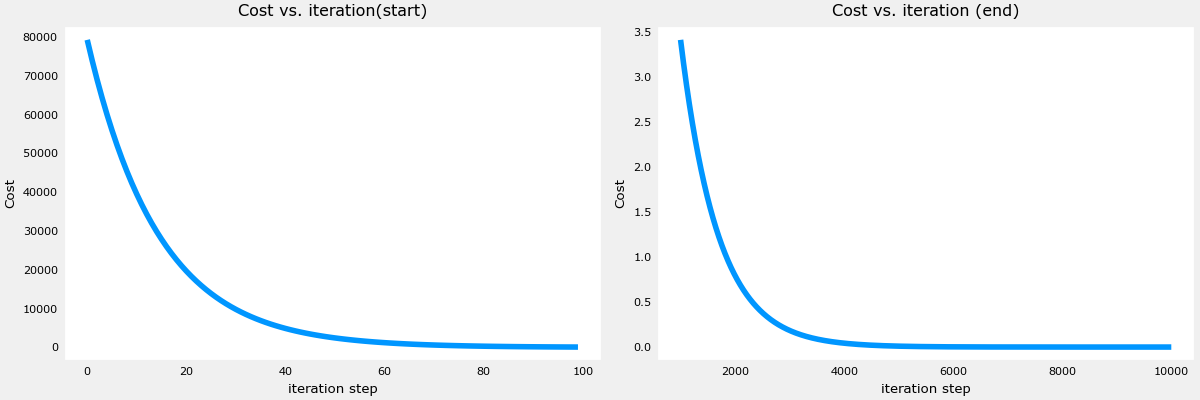

In [112]:
plt.close('all')
fig, (ax1, ax2)=plt.subplots(1,2, constrained_layout=True, figsize=(12,4))
ax1.plot(j_hist[:100])
ax2.plot(1000+np.arange(len(j_hist[1000:])), j_hist[1000:])
ax1.set_title("Cost vs. iteration(start)")
ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')          
ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')
ax2.set_xlabel('iteration step') 
plt.show()

### Predictions
Now that you have discovered the optimal values for the parameters $w$ and $b$, you can now use the model to predict housing values based on our learned parameters. As expected, the predicted values are nearly the same as the training values for the same housing. Further, the value not in the prediction is in line with the expected value.

In [113]:
print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_final*1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final*2.0 + b_final:0.1f} Thousand dollars")

1000 sqft house prediction 300.0 Thousand dollars
1200 sqft house prediction 340.0 Thousand dollars
2000 sqft house prediction 500.0 Thousand dollars


## Plotting
You can show the progress of gradient descent during its execution by plotting the cost over iterations on a contour plot of the cost(w,b). 

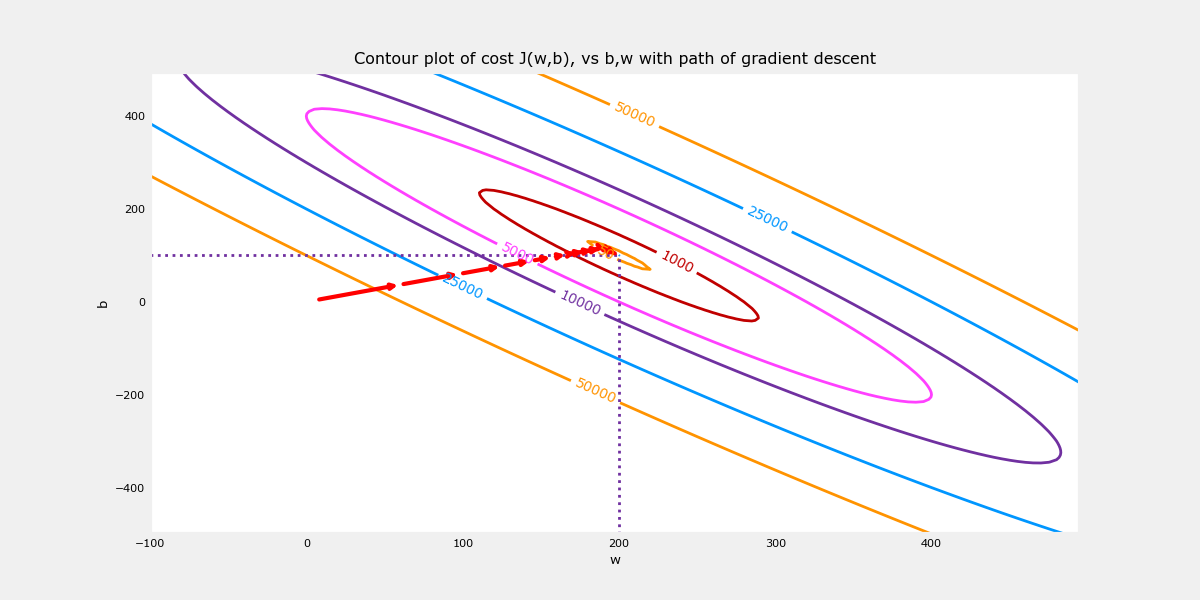

In [114]:
plt.close('all')
fig, ax=plt.subplots(1,1, figsize=(12,6))
plt_contour_wgrad(x_train, y_train, p_hist, ax)

Above, the contour plot shows the $cost(w,b)$ over a range of $w$ and $b$. Cost levels are represented by the rings. Overlayed, using red arrows, is the path of gradient descent. Here are some things to note:
- The path makes steady (monotonic) progress toward its goal.
- Initial steps are much larger than the steps near the goal.

**Zooming in**, we can see that final steps of gradient descent. Note the distance between steps shrinks as the gradient approaches zero.

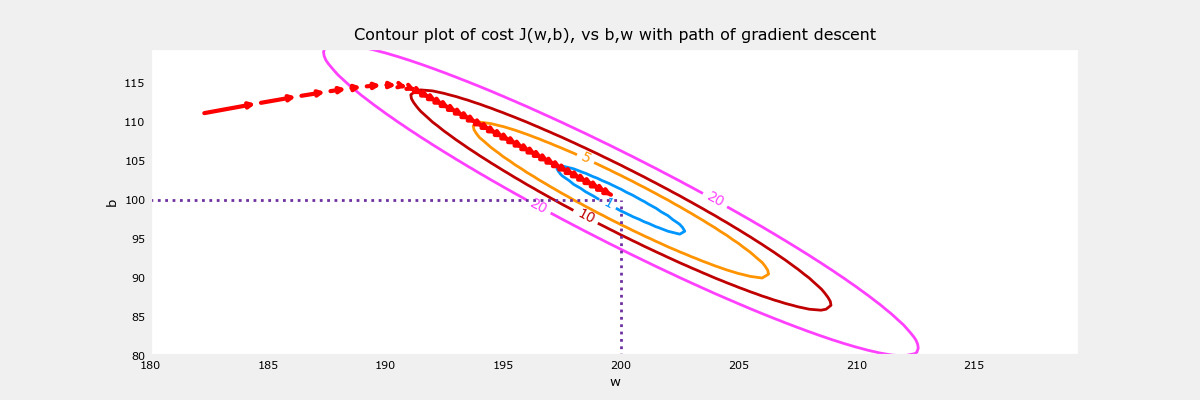

In [115]:
plt.close('all')
fig, ax=plt.subplots(1,1, figsize=(12,4))
plt_contour_wgrad(x_train, y_train, p_hist, ax, w_range=[180, 220, 0.5], b_range=[80, 120, 0.5], 
                  contours=[1,5,10,20],resolution=0.5)

The larger $\alpha$ is, the faster gradient descent will converge to a solution. But, if it is too large, gradient descent will diverge. Above you have an example of a solution which converges nicely.

Let's try increasing the value of  $\alpha$ and see what happens:

In [117]:
plt.close('all')
w_init=0
b_init=0
iterations=10
tmp_alpha=8.0e-1 #set alpha to a large value
w_final, b_final, j_hist, p_hist=gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)

Iteration    0: Cost 2.58e+05 dj_dw: -6.500e+02, dj_db: -4.000e+02 w: 5.200e+02, b:3.20000e+02
Iteration    1: Cost 7.82e+05 dj_dw: 1.130e+03, dj_db: 7.000e+02 w: -3.840e+02, b:-2.40000e+02
Iteration    2: Cost 2.37e+06 dj_dw: -1.970e+03, dj_db: -1.216e+03 w: 1.192e+03, b:7.32800e+02
Iteration    3: Cost 7.19e+06 dj_dw: 3.429e+03, dj_db: 2.121e+03 w: -1.551e+03, b:-9.63840e+02
Iteration    4: Cost 2.18e+07 dj_dw: -5.974e+03, dj_db: -3.691e+03 w: 3.228e+03, b:1.98886e+03
Iteration    5: Cost 6.62e+07 dj_dw: 1.040e+04, dj_db: 6.431e+03 w: -5.095e+03, b:-3.15579e+03
Iteration    6: Cost 2.01e+08 dj_dw: -1.812e+04, dj_db: -1.120e+04 w: 9.402e+03, b:5.80237e+03
Iteration    7: Cost 6.09e+08 dj_dw: 3.156e+04, dj_db: 1.950e+04 w: -1.584e+04, b:-9.80139e+03
Iteration    8: Cost 1.85e+09 dj_dw: -5.496e+04, dj_db: -3.397e+04 w: 2.813e+04, b:1.73730e+04
Iteration    9: Cost 5.60e+09 dj_dw: 9.572e+04, dj_db: 5.916e+04 w: -4.845e+04, b:-2.99567e+04


Above, $w$ and $b$ are bouncing back and forth between positive and negative with the absolute value increasing with each iteration. Further, each iteration $\frac{\partial J(w,b)}{\partial w}$ changes sign and cost is increasing rather than decreasing. This is a clear sign that the *learning rate is too large* and the solution is diverging. 
Let's visualize this with a plot.

In [ ]:
plt.close('all')
plt_divergence(p_hist, j_hist, x_train, y_train)
plt.show()

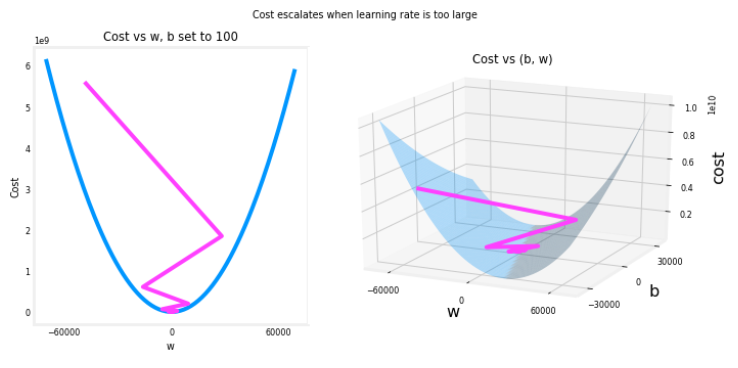

Above, the left graph shows $w$'s progression over the first few steps of gradient descent. $w$ oscillates from positive to negative and cost grows rapidly. Gradient Descent is operating on both $w$ and $b$ simultaneously, so one needs the 3-D plot on the right for the complete picture.